# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile VII: Time Series Chains:
https://sites.google.com/site/timeserieschain/

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [6]:
import helper.testdata as testdata
import helper.utils as utils
import helper.calculate as calculate
import helper.visualize as visualize

## Tilt Table Short Data (Robust Time Series Chain Discovery with Incremental Nearest Neighbors) ##
The arterial blood pressure (ABP) signal of a patient lying on a tilt table.

m = 180, length of a cardiac cycle (Robust Time Series Chain Discovery with Incremental Nearest Neighbors)

m = 200 (MP VII)

m = 205 (own research)

In [7]:
# Parameter
use_case = "chains"
data_name = "tilttableshort"
T = testdata.load_from_mat("../data/" + use_case + "/" + data_name + ".mat", "tilt_table")

### Experiments ###

In [8]:
# Hyperparameter
target_w = 180
dilation_sizes = utils.calculate_dilation_sizes(target_w)

print("Dilation Sizes:", dilation_sizes)

Dilation Sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [9]:
# calculate
calculate.chains(T, dilation_sizes, target_w, data_name, use_case)

Calculated MP for: w=180, m=180, d=1
Calculated MP for: w=181, m=91, d=2
Calculated MP for: w=181, m=61, d=3
Calculated MP for: w=181, m=46, d=4
Calculated MP for: w=181, m=37, d=5
Calculated MP for: w=181, m=31, d=6
Calculated MP for: w=183, m=27, d=7
Calculated MP for: w=177, m=23, d=8
Calculated MP for: w=181, m=21, d=9
Calculated MP for: w=181, m=19, d=10
Calculated MP for: w=177, m=17, d=11
Calculated MP for: w=181, m=16, d=12
Calculated MP for: w=183, m=15, d=13


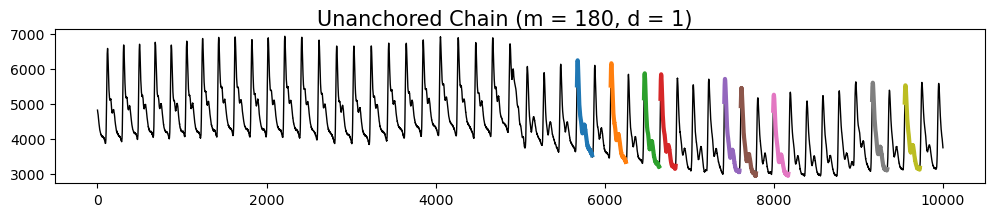

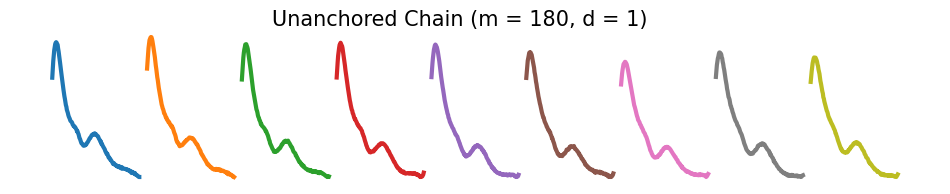

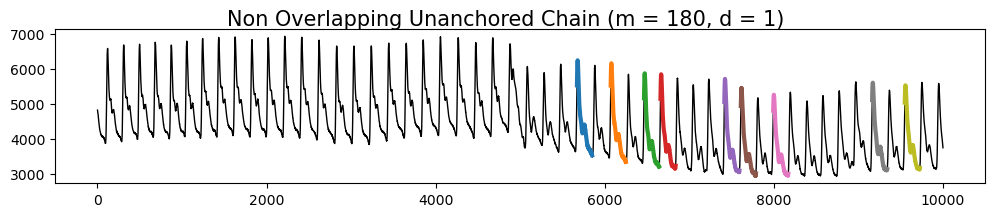

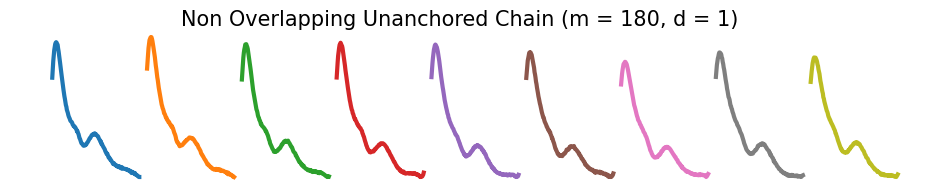

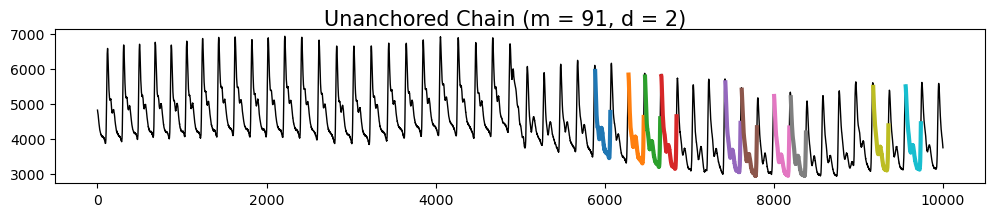

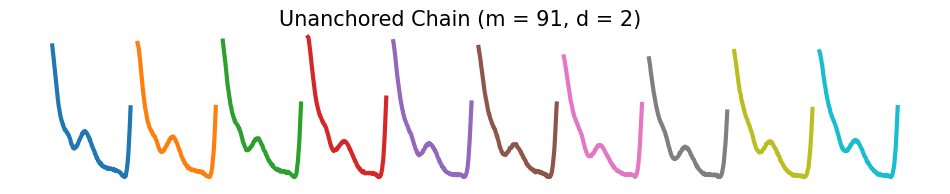

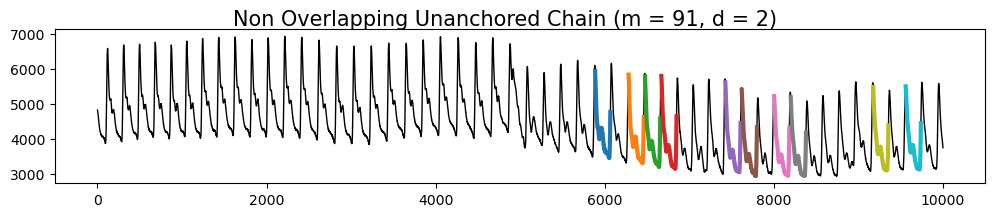

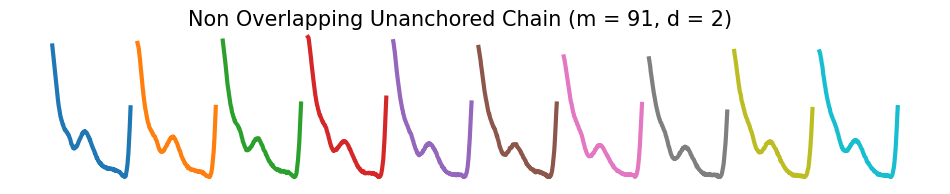

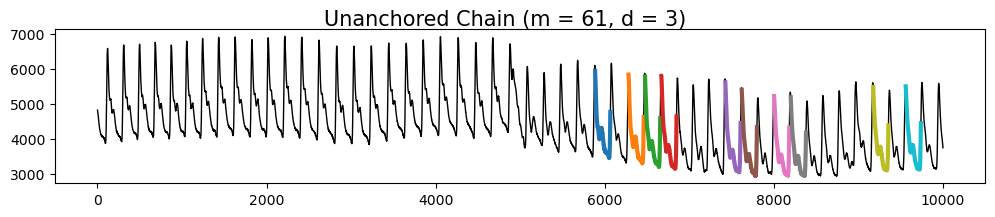

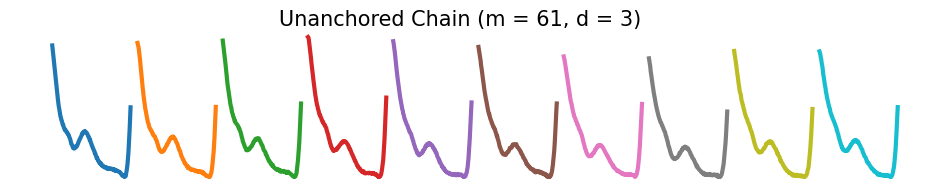

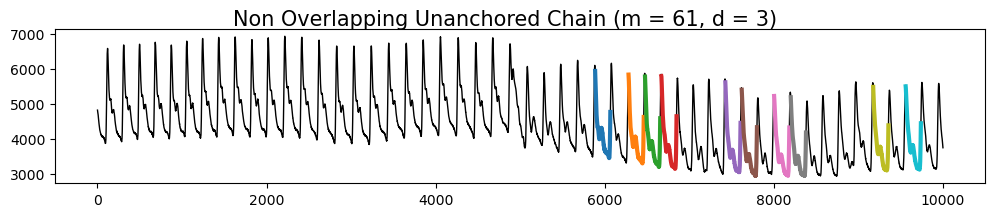

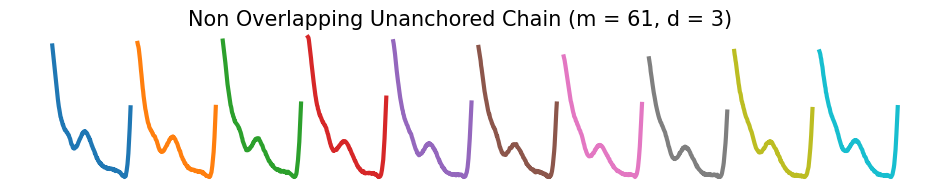

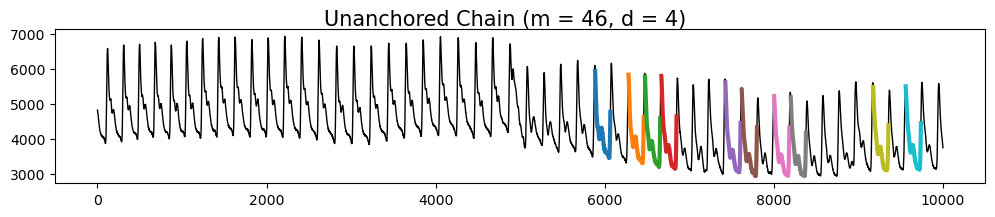

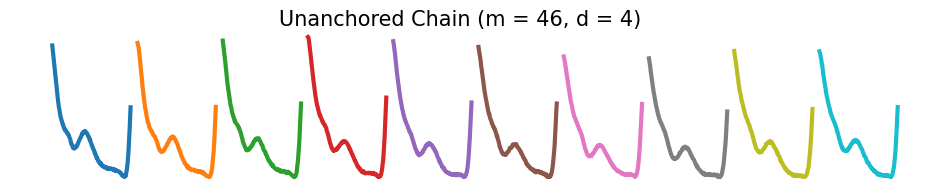

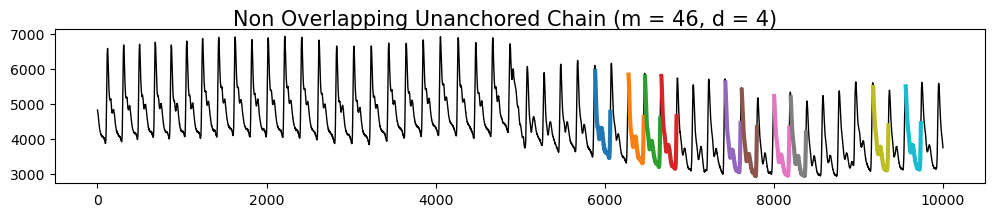

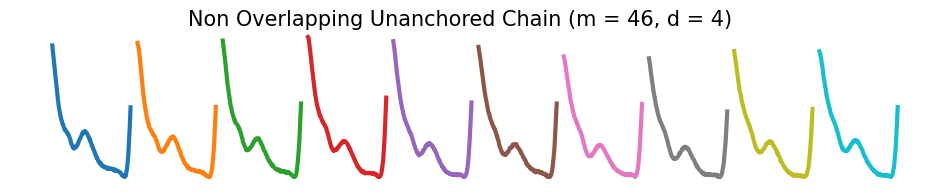

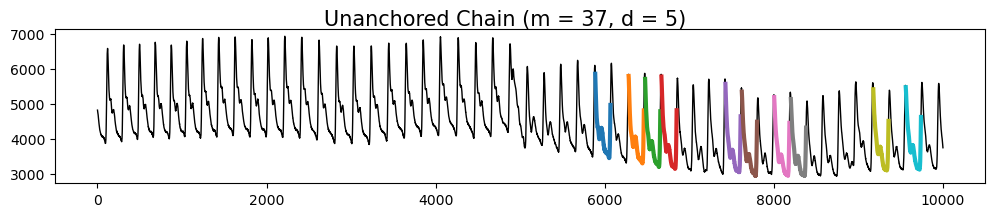

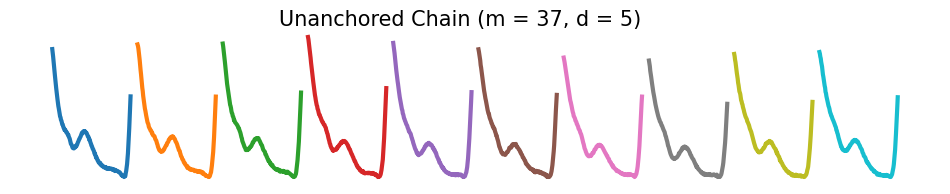

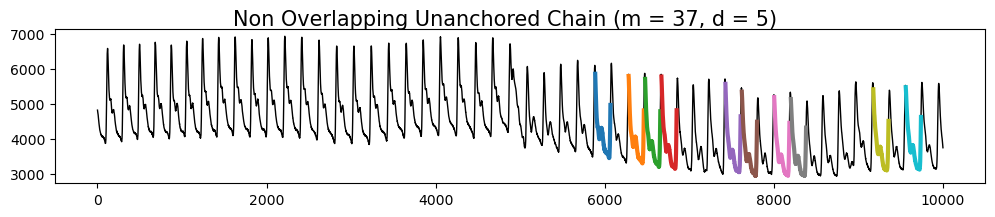

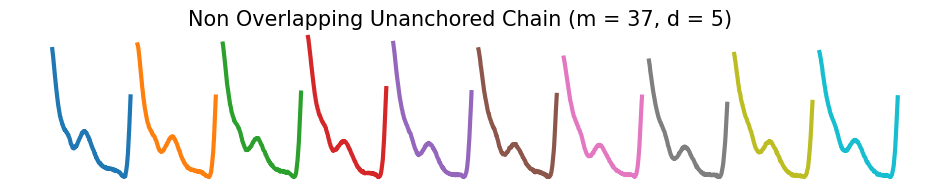

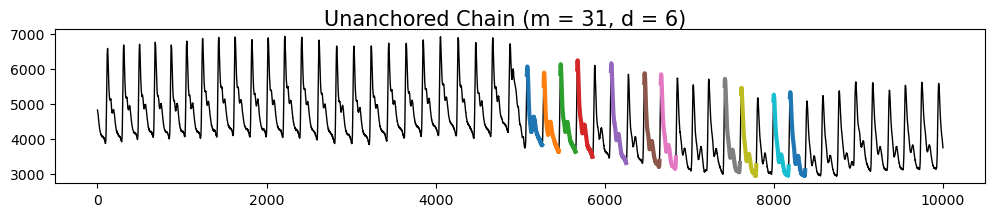

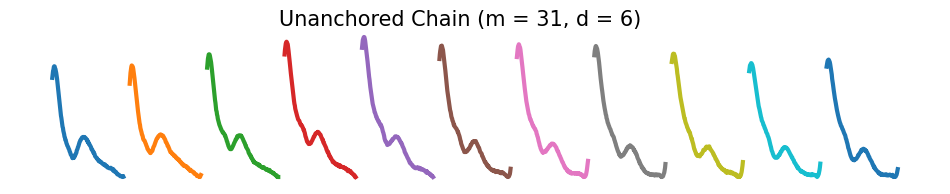

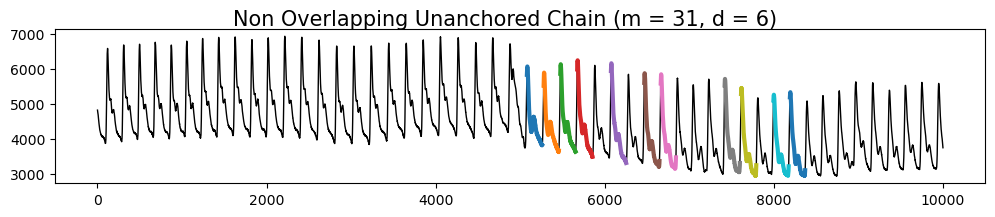

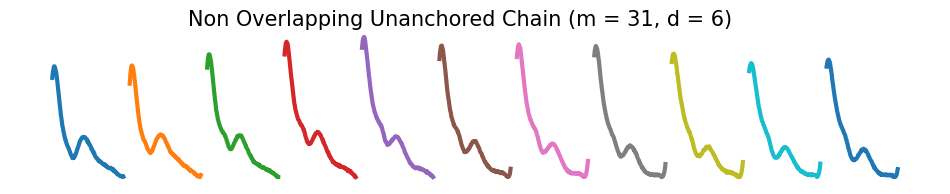

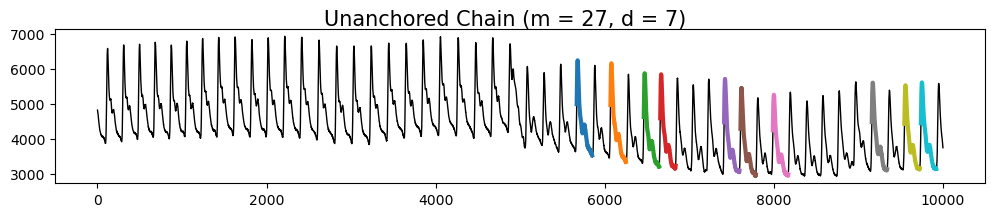

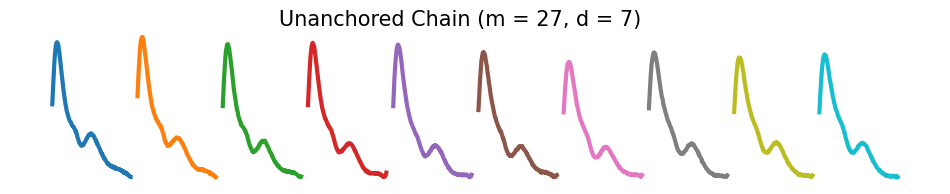

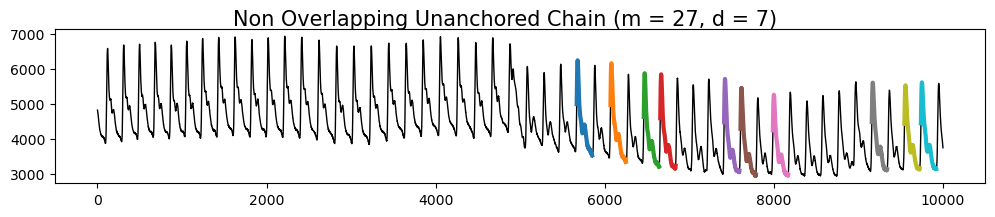

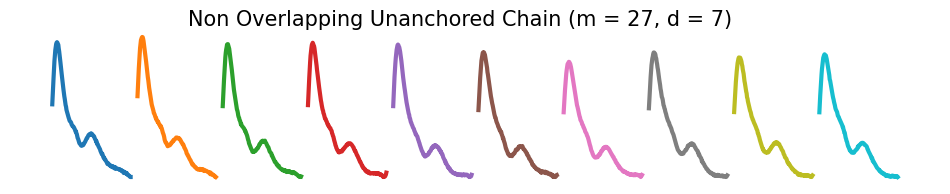

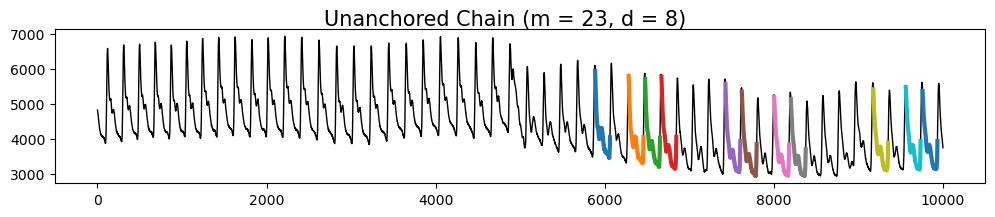

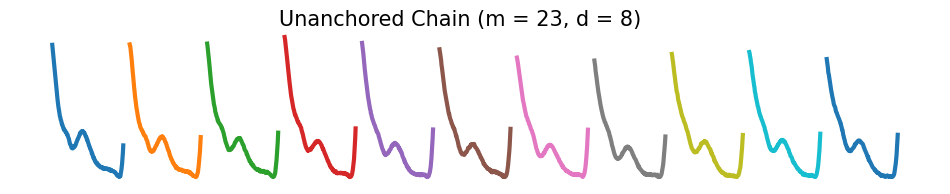

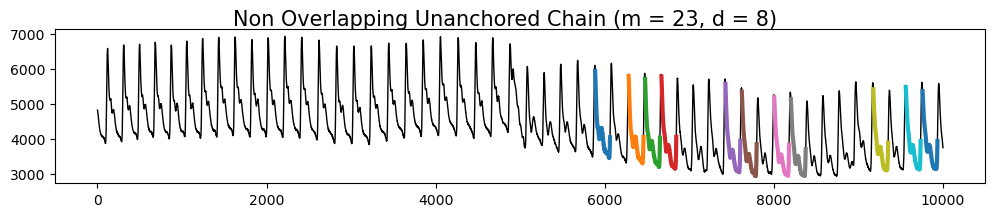

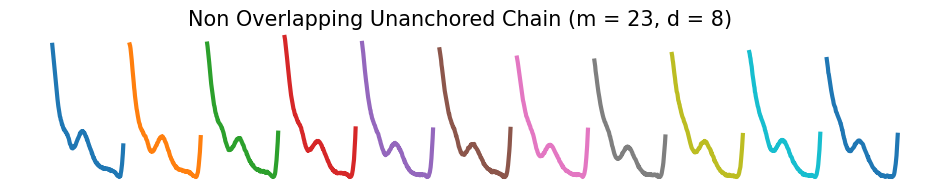

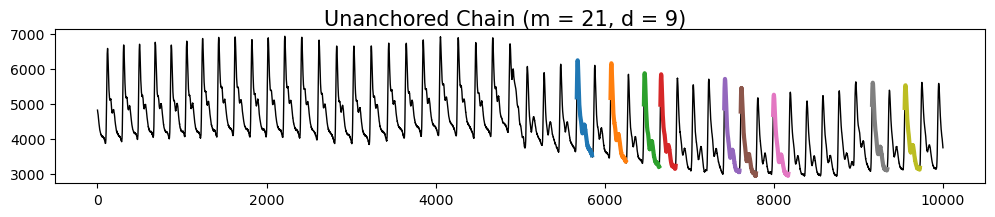

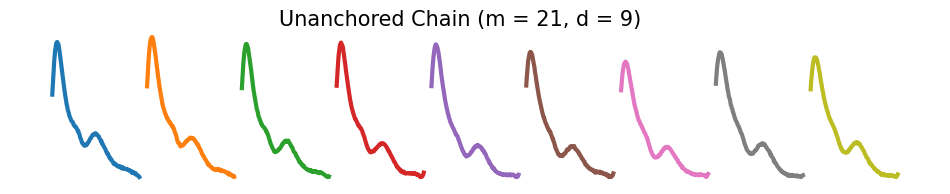

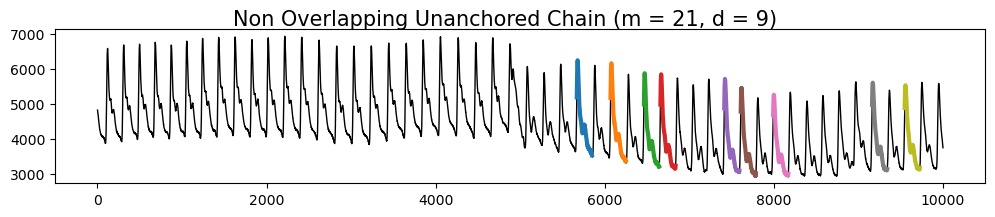

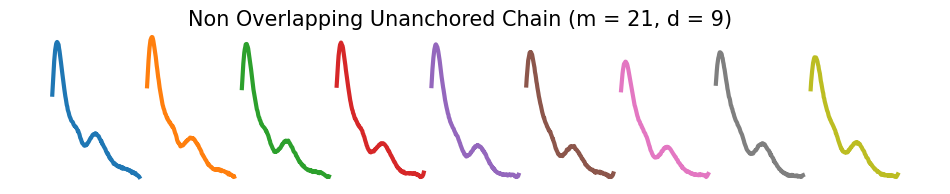

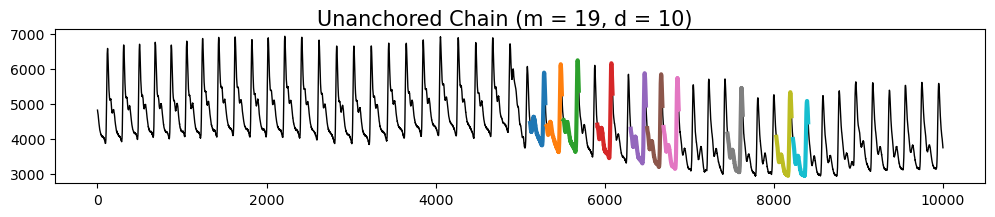

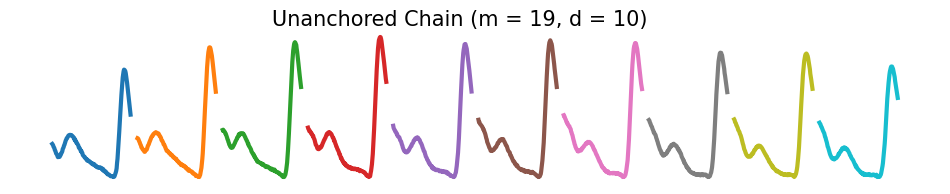

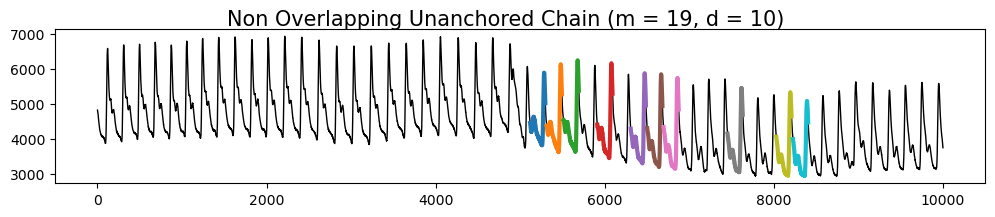

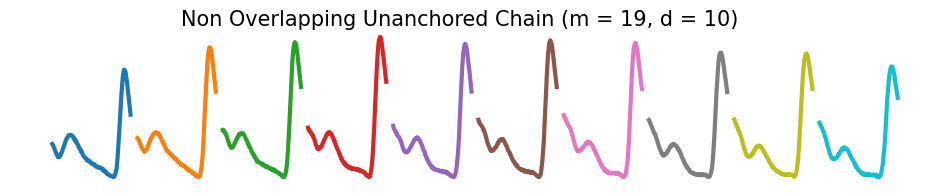

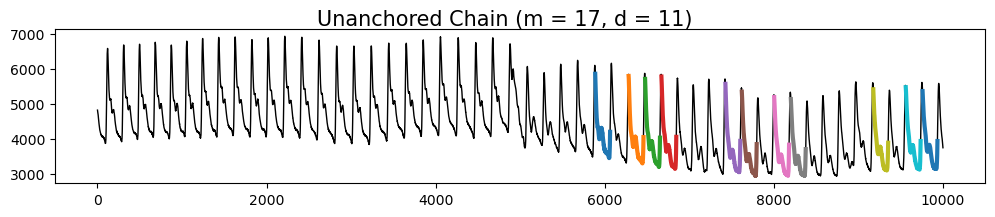

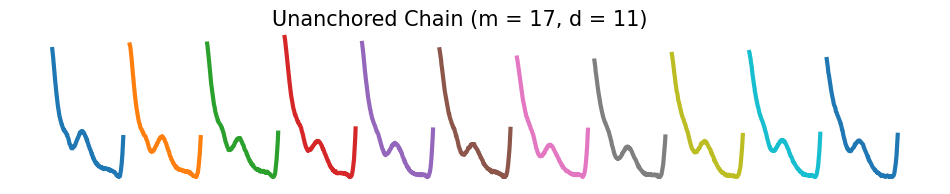

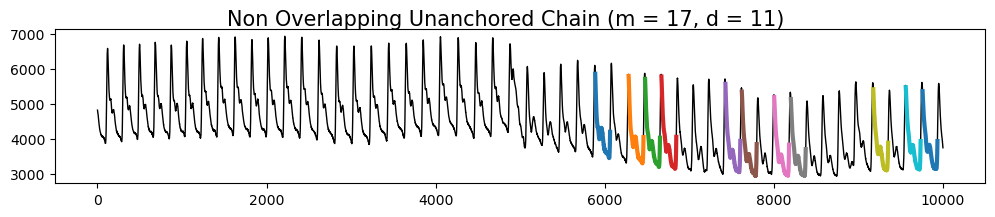

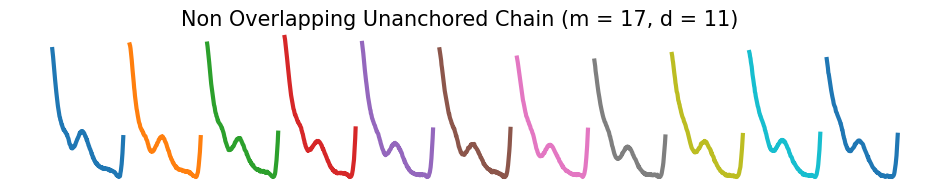

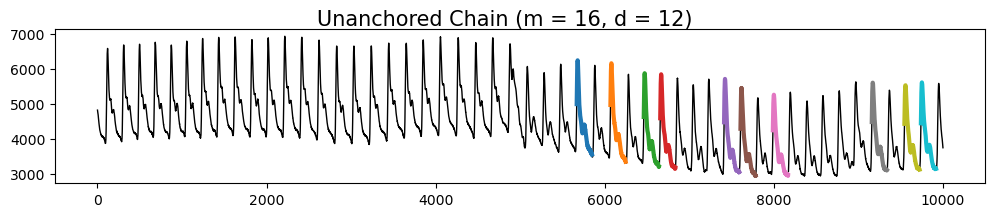

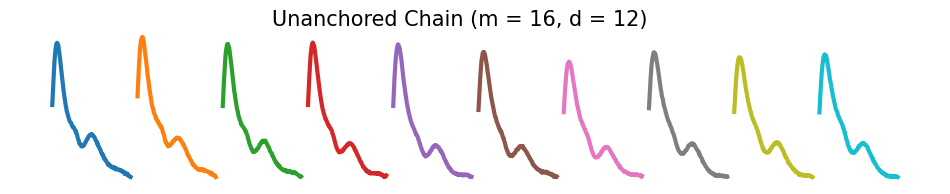

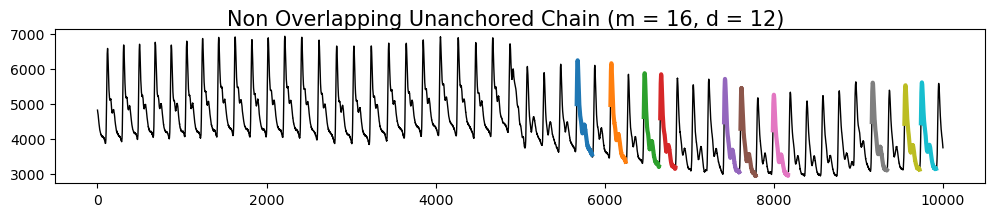

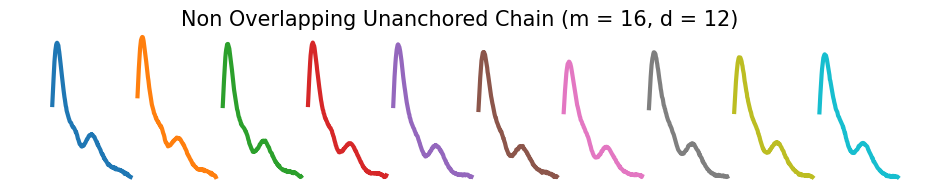

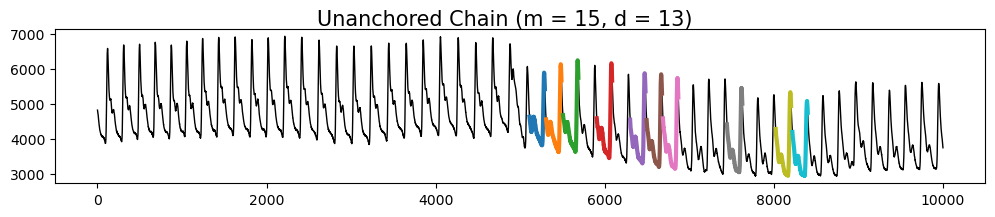

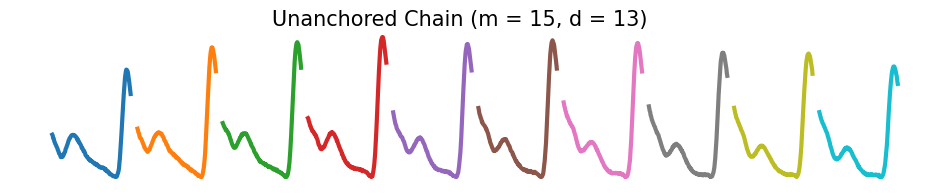

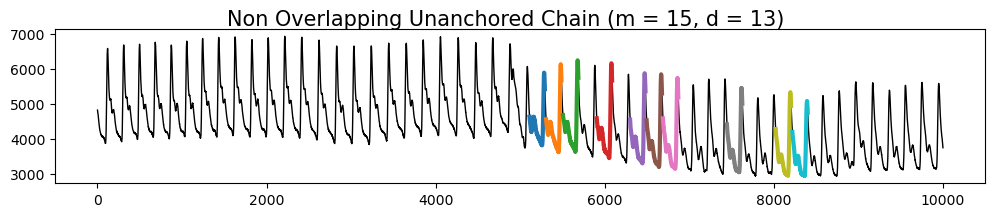

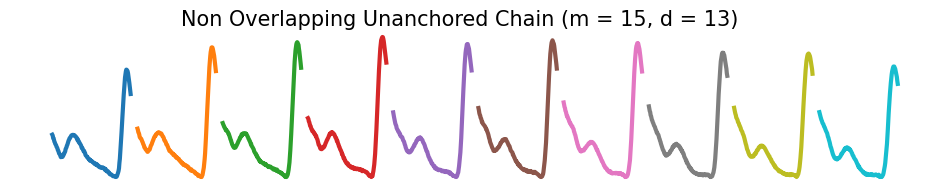

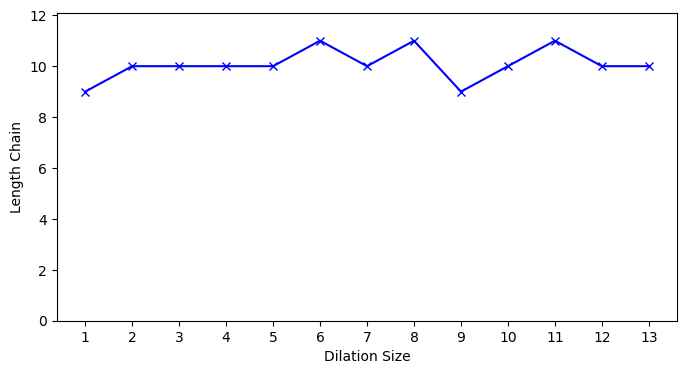

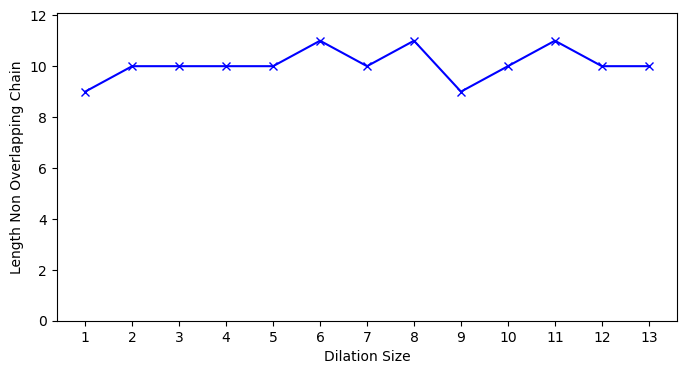

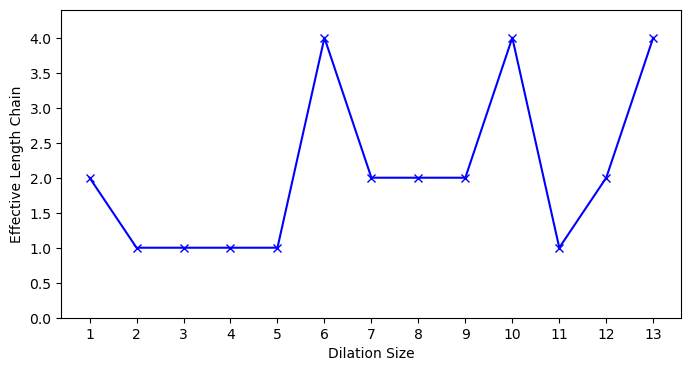

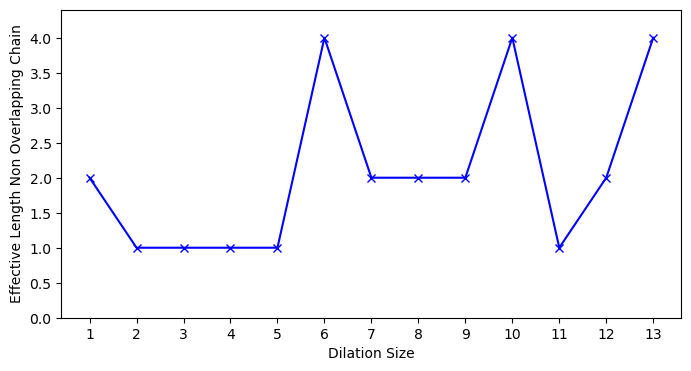

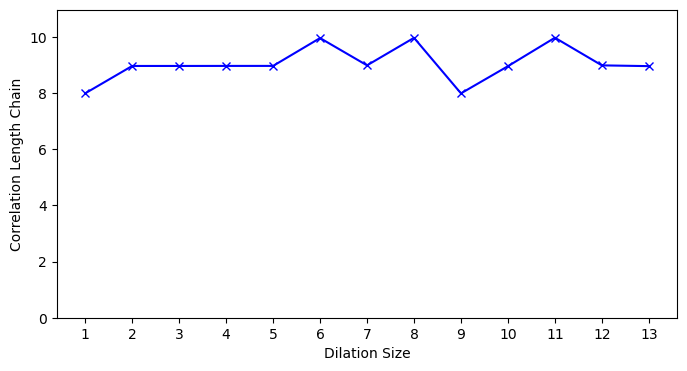

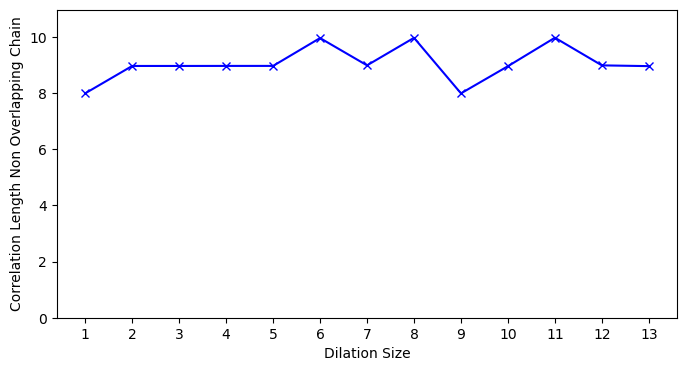

In [10]:
# visualize:
visualize.chains(dilation_sizes, target_w, data_name, use_case)